## Importing Libraries

##**Data augmentation is a crucial technique to artificially increase the size of your training dataset.**
###**ImageDataGenerator:**
Use ImageDataGenerator from TensorFlow to apply random transformations:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow training data through generator
train_generator = datagen.flow(
    x_train,
    y_train,
    batch_size=128,
    seed=42
)

# Flow validation data through generator (without augmentation)
validation_generator = ImageDataGenerator().flow(
    x_test,
    y_test,
    batch_size=128,
    seed=42
)

##**Data Augmentation Parameters:**
1. rotation_range: Rotate images up to 30 degrees.
2. width_shift_range and height_shift_range: Shift images horizontally/vertically up to 20%.
3. shear_range: Apply shear transformation up to 30 degrees.
4. zoom_range: Randomly zoom images up to 20%.
5. horizontal_flip: Flip images horizontally.

##**Train Model:**
Pass generators to model.fit:

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

##**Why Data Augmentation?**
Data augmentation is a technique to artificially increase the size of your training dataset by applying random transformations to existing images.
###**Advantages:**
1. Improved Model Generalization: Augmented data helps models learn invariant features, improving performance on unseen data.
2. Reduced Overfitting: Increased dataset size reduces overfitting by providing more diverse training examples.
3. Increased Robustness: Models become more robust to variations in orientation, scale, and lighting.
4. Better Handling of Class Imbalance: Augmentation can balance class distributions, reducing bias.
###**Disadvantages:**
1. Computational Overhead: Augmentation increases computational requirements for training.
2. Risk of Over-Augmentation: Excessive augmentation can lead to degraded model performance.
3. Potential for Unrealistic Examples: Aggressive augmentation may produce unrealistic images.
###**Common Data Augmentation Techniques:**
1. Rotation: Rotate images by a certain angle.
2. Flipping: Flip images horizontally or vertically.
3. Scaling: Resize images.
4. Translation: Shift images horizontally or vertically.
5. Color Jittering: Apply random color transformations.
6. Noise Injection: Add random noise to images.
7. Cutout: Randomly remove rectangular regions.
###**ImageDataGenerator Parameters:**
1. rotation_range: Rotate images up to a specified angle.
2. width_shift_range and height_shift_range: Shift images horizontally/vertically.
3. shear_range: Apply shear transformation.
4. zoom_range: Randomly zoom images.
5. horizontal_flip: Flip images horizontally.
###**Best Practices:**
1. Start with Mild Augmentation: Gradually increase augmentation intensity.
2. Monitor Performance: Validate model performance on a separate dataset.
3. Use Transfer Learning: Leverage pre-trained models.
###**Real-World Applications:**
1. Self-Driving Cars: Augment data for object detection and recognition.
2. Medical Imaging: Enhance robustness for disease diagnosis.
3. Facial Recognition: Improve accuracy with pose and lighting variations.
Code Example:
Python
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(

    rotation_range=30,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=30,

    zoom_range=0.2,

    horizontal_flip=True)

##**MaxPooling2D vs GlobalMaxPooling2D**
#**MaxPooling2D:**
1. Spatial Downsampling: Reduces spatial dimensions of feature maps.
2. Local Max Pooling: Takes maximum value across each window (e.g., 2x2).
3. Output Shape: Reduced spatial dimensions, but same number of channels.
#**GlobalMaxPooling2D:**
1. Global Downsampling: Collapses entire spatial dimensions into a single value.
2. Global Max Pooling: Takes maximum value across entire feature map.
3. Output Shape: 1D vector with same number of channels.
#**Key Differences:**
1. Spatial Information: MaxPooling2D retains some spatial information, while GlobalMaxPooling2D discards it.
2. Output Dimensions: MaxPooling2D reduces spatial dimensions, while GlobalMaxPooling2D collapses them entirely.
#**Use Cases:**
###**MaxPooling2D:**
1. Convolutional Neural Networks (CNNs) for image classification.
2. Object detection tasks requiring spatial information.
###**GlobalMaxPooling2D:**
1. Image classification tasks where spatial information is irrelevant.
2. Transfer learning, where pre-trained models are fine-tuned.
#**Code Example:**

from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D

# MaxPooling2D

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))

# GlobalMaxPooling2D

model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(GlobalMaxPooling2D())

##**Additional Pooling Layers:**
1. AveragePooling2D: Takes average value across each window.
2. GlobalAveragePooling2D: Takes average value across entire feature map.
##**Best Practices:**
1. Use MaxPooling2D for tasks requiring spatial information.
2. Use GlobalMaxPooling2D for tasks where spatial information is irrelevant.
3. Experiment with different pooling layers and configurations.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(nc, activation="softmax"))

####**Here's a detailed breakdown of each layer, including parameters, neurons, input shape, and output shape:**
#**Layer 1: Conv2D (32)**
1. Input Shape: (32, 32, 3)
2. Output Shape: (32, 32, 32)
3. Number of Neurons: 32 x 32 x 32 = 32,768
4. Number of Parameters: 896 (32 filters x 3 x 3 kernel x 3 input channels + 32 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 2: Conv2D (32)**
1. Input Shape: (32, 32, 32)
2. Output Shape: (32, 32, 32)
3. Number of Neurons: 32 x 32 x 32 = 32,768
4. Number of Parameters: 9,216 (32 filters x 32 input channels x 3 x 3 kernel + 32 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 3: MaxPooling2D**
1. Input Shape: (32, 32, 32)
2. Output Shape: (16, 16, 32)
3. Number of Neurons: 16 x 16 x 32 = 8,192
4. Number of Parameters: 0
5. Pool Size: 2x2
#**Layer 4: Dropout (0.25)**
1. Input Shape: (16, 16, 32)
2. Output Shape: (16, 16, 32)
3. Number of Neurons: 6,144 (75% of 8,192)
4. Number of Parameters: 0
#**Layer 5: Conv2D (64)**
1. Input Shape: (16, 16, 32)
2. Output Shape: (16, 16, 64)
3. Number of Neurons: 16 x 16 x 64 = 16,384
4. Number of Parameters: 18,432 (64 filters x 32 input channels x 3 x 3 kernel + 64 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 6: Conv2D (64)**
1. Input Shape: (16, 16, 64)
2. Output Shape: (16, 16, 64)
3. Number of Neurons: 16 x 16 x 64 = 16,384
4. Number of Parameters: 36,864 (64 filters x 64 input channels x 3 x 3 kernel + 64 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 7: MaxPooling2D**
1. Input Shape: (16, 16, 64)
2. Output Shape: (8, 8, 64)
3. Number of Neurons: 8 x 8 x 64 = 4,096
4. Number of Parameters: 0
5. Pool Size: 2x2
#**Layer 8: Dropout (0.25)**
1. Input Shape: (8, 8, 64)
2. Output Shape: (8, 8, 64)
3. Number of Neurons: 3,072 (75% of 4,096)
4. Number of Parameters: 0
#**Layer 9: Conv2D (96)**
1. Input Shape: (8, 8, 64)
2. Output Shape: (8, 8, 96)
3. Number of Neurons: 8 x 8 x 96 = 6,144
4. Number of Parameters: 55,296 (96 filters x 64 input channels x 3 x 3 kernel + 96 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 10: Conv2D (96)**
1. Input Shape: (8, 8, 96)
2. Output Shape: (8, 8, 96)
3. Number of Neurons: 8 x 8 x 96 = 6,144
4. Number of Parameters: 110,592 (96 filters x 96 input channels x 3 x 3 kernel + 96 biases)
5. Kernel Size: 3x3
6. Activation: ReLU
#**Layer 11: MaxPooling2D**
1. Input Shape: (8, 8, 96)
2. Output Shape: (4, 4, 96)
3. Number of Neurons: 4 x 4 x 96 = 1,536
4. Number of Parameters: 0
5. Pool Size: 2x2
6. Stride: 2x2
#**Layer 12: Flatten**
1. Input Shape: (4, 4, 96)
2. Output Shape: (1, 384)
3. Number of Neurons: 1,536
4. Number of Parameters: 0
#**Layer 13: Dropout (0.4)**
1. Input Shape: (1, 384)
2. Output Shape: (1, 384)
3. Number of Neurons: 921 (60% of 1,536)
4. Number of Parameters: 0
#**Layer 14: Dense (256)**
1. Input Shape: (1, 384)
2. Output Shape: (256)
3. Number of Neurons: 256
4. Number of Parameters: 393,216 (256 neurons x 384 input neurons + 256 biases)
#**Layer 15: Dropout (0.4)**
1. Input Shape: (256)
2. Output Shape: (256)
3. Number of Neurons: 153 (60% of 256)
4. Number of Parameters: 0
#**Layer 16: Dense (128)**
1. Input Shape: (256)
2. Output Shape: (128)
3. Number of Neurons: 128
4. Number of Parameters: 32,896 (128 neurons x 256 input neurons + 128 biases)
#**Layer 17: Dropout (0.4)**
1. Input Shape: (128)
2. Output Shape: (128)
3. Number of Neurons: 77 (60% of 128)
4. Number of Parameters: 0
#**Layer 18: Dense (nc)**
1. Input Shape: (128)
2. Output Shape: (nc)
3. Number of Neurons: nc
4. Number of Parameters: nc x 128 (nc neurons x 128 input neurons + nc biases)


#**Total Parameters: 741,472 + nc x 128**
#**Total Neurons: 32,768 + 32,768 + 8,192 + 16,384 + 16,384 + 4,096 + 6,144 + 6,144 + 1,536 + 256 + 128 + nc**
#**Input Shape: (32, 32, 3)**


###**Using two consecutive Conv2D layers with 32 filters is a common technique in Convolutional Neural Networks (CNNs). Here's why:**
###**Reasons for two Conv2D layers:**
1. Feature Extraction: The first Conv2D layer extracts low-level features from the input image, such as edges and lines. The second Conv2D layer extracts higher-level features, combining the outputs from the first layer.
2. Increased Non-Linearity: Two Conv2D layers allow for more non-linear transformations, enabling the network to learn more complex representations.
Improved Feature Representation: By stacking two Conv2D layers, the network can learn a more robust feature representation, which improves performance.
Why 32 filters?
3. Number of Filters: 32 is a relatively small number of filters, allowing the network to learn a compact representation of the input data.
4. Computational Efficiency: Using 32 filters reduces computational requirements compared to using more filters.
5. Balancing Complexity and Capacity: 32 filters provide a balance between model complexity and capacity to learn.
##**Benefits:**
1. Improved Accuracy: Stacking two Conv2D layers can improve model accuracy.
2. Robustness to Variations: The network becomes more robust to variations in input data.
##**Common Architectures:**
1. VGGNet: Uses multiple convolutional layers with small filter sizes.
2. ResNet: Employs residual connections between convolutional layers.

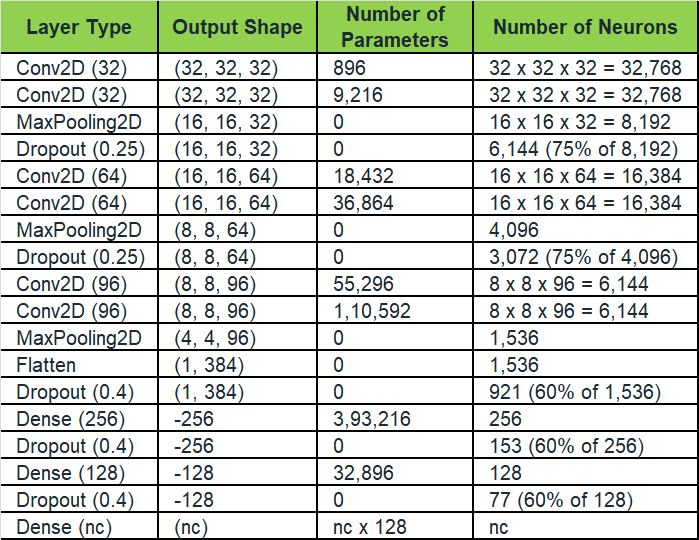

**Total Parameters: 741,472 + nc x 128**

**Total Neurons: 32,768 + 32,768 + 8,192 + 16,384 + 16,384 + 4,096 + 6,144 + 6,144 + 1,536 + 256 + 128 + nc**

**Input Shape: (32, 32, 3)**

**Output Shape: (nc)**

**Number of Classes (nc): depends on the problem (e.g., 10 for CIFAR-10, 100 for CIFAR-100)**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plotter

# Split the data into training and testing set.
from sklearn.model_selection import train_test_split

# Libraries used to evaluate our trained model.
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf  # Import TensorFlow

# Loading our dataset.
from tensorflow.keras.datasets import cifar10  # Use tensorflow.keras

# Used for data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras

# Below are some layers used to train convolutional neural network.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten

In [4]:
# Define class/labels for CIFAR-10 dataset
class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

## Loading Dataset

In [5]:
# number of classes
nc = 10

(training_data, training_label), (testing_data, testing_label) = cifar10.load_data()


(
    (training_data),
    (validation_data),
    (training_label),
    (validation_label),
) = train_test_split(training_data, training_label, test_size=0.2, random_state=42)


training_data = training_data.astype("float32")
testing_data = testing_data.astype("float32")
validation_data = validation_data.astype("float32")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


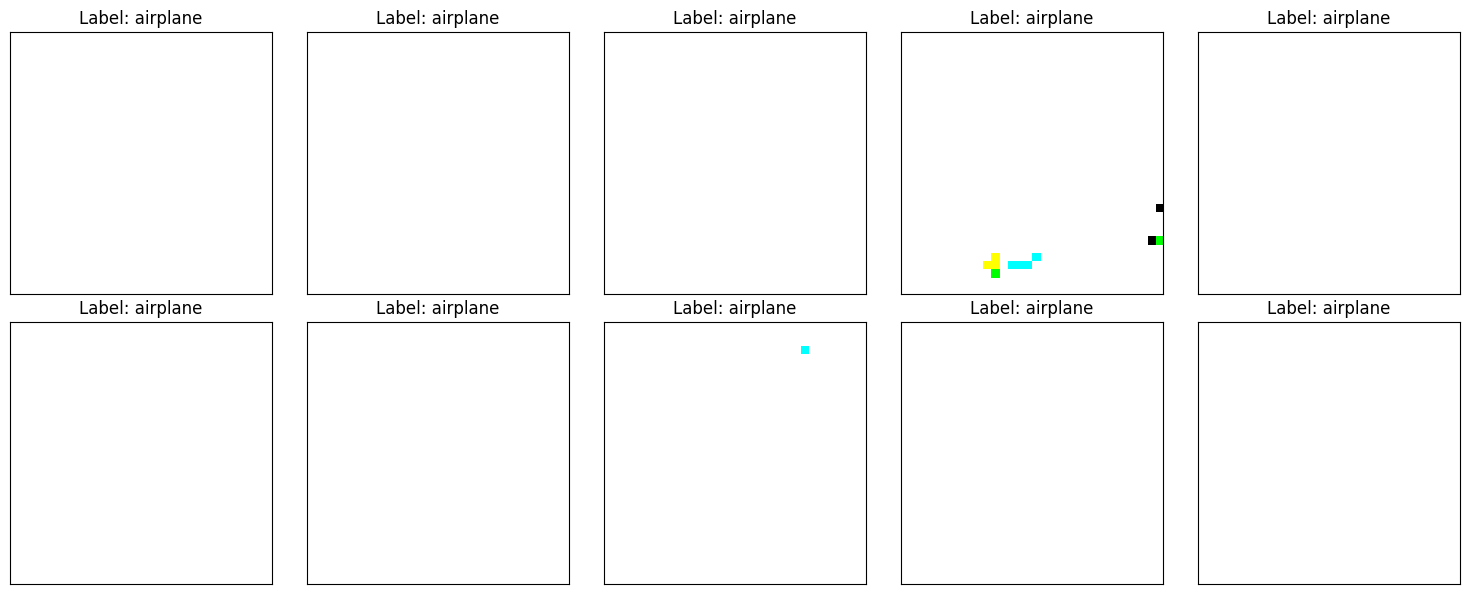

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select 10 random indices from training data
indices = np.random.choice(len(training_data), size=10, replace=False)

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iterate over selected indices and axes
for i, (index, ax) in enumerate(zip(indices, axes.flat)):
    # Display image
    ax.imshow(training_data[index])

    # Get label
    label = class_labels[np.argmax(training_label[index])]

    # Set title
    ax.set_title(f"Label: {label}")

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Layout so plots do not overlap
fig.tight_layout()

# Display plot
plt.show()

## Data Preprocessing

In [7]:
# Normalization
training_data /= 255
testing_data /= 255
validation_data /= 255

# One Hot Encoding
training_label = keras.utils.to_categorical(training_label, nc)
testing_label = keras.utils.to_categorical(testing_label, nc)
validation_label = keras.utils.to_categorical(validation_label, nc)

# Printing the dataset
print("Training: ", training_data.shape, len(training_label))
print("Validation: ", validation_data.shape, len(validation_label))
print("Testing: ", testing_data.shape, len(testing_label))

Training:  (40000, 32, 32, 3) 40000
Validation:  (10000, 32, 32, 3) 10000
Testing:  (10000, 32, 32, 3) 10000


## Model Building

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(96, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(nc, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# obtaining the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 96)            │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 631,658 (2.41 MB)

 Trainable params: 631,658 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
augmentor = ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=False,
    vertical_flip=True,
)

# fitting in augmentor
augmentor.fit(training_data)

# obtaining the history
history = model.fit(
    augmentor.flow(training_data, training_label, batch_size=32),
    epochs=100,
    validation_data=(validation_data, validation_label),
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.1327 - loss: 2.2353 - val_accuracy: 0.2644 - val_loss: 1.9143
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.2281 - loss: 1.9998 - val_accuracy: 0.2686 - val_loss: 1.8747
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.2571 - loss: 1.9185 - val_accuracy: 0.3007 - val_loss: 1.7844
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.2808 - loss: 1.8620 - val_accuracy: 0.3299 - val_loss: 1.7273
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3066 - loss: 1.8127 - val_accuracy: 0.3634 - val_loss: 1.6464
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3350 - loss: 1.7505 - val_accuracy: 0.3583 - val_loss: 1.6669
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3517 - loss: 1.7081 - val_accuracy: 0.3623 - val_loss: 1.6954
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3691 - los

In [12]:
model.evaluate(testing_data, testing_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.9392


[0.9571531414985657, 0.6858000159263611]

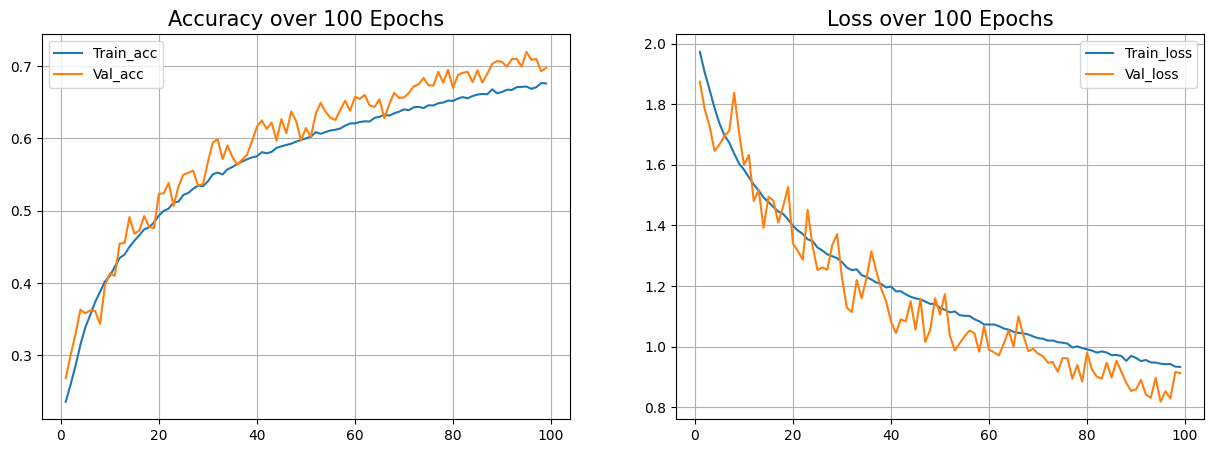

In [13]:
def acc_loss_curves(result, epochs):
    acc = result.history["accuracy"]
    # obtaining loss and accuracy
    loss = result.history["loss"]
    # declaring values of loss and accuracy
    val_acc = result.history["val_accuracy"]
    val_loss = result.history["val_loss"]
    # plotting the figure
    plotter.figure(figsize=(15, 5))
    plotter.subplot(121)
    plotter.plot(range(1, epochs), acc[1:], label="Train_acc")
    plotter.plot(range(1, epochs), val_acc[1:], label="Val_acc")
    # giving title to plot
    plotter.title("Accuracy over " + str(epochs) + " Epochs", size=15)
    plotter.legend()
    plotter.grid(True)
    # passing value 122
    plotter.subplot(122)
    # using train loss
    plotter.plot(range(1, epochs), loss[1:], label="Train_loss")
    plotter.plot(range(1, epochs), val_loss[1:], label="Val_loss")
    # using epocs
    plotter.title("Loss over " + str(epochs) + " Epochs", size=15)
    plotter.legend()
    # passing true vallues
    plotter.grid(True)
    # printing the grapb
    plotter.show()


acc_loss_curves(history, 100)

In [15]:
# Save model to file
model.save('cifar10_model.h5')

# Alternatively, save weights only
model.save_weights('cifar10.weights.h5')

In [16]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Test/predict unseen images
def predict_image(image_path):
    # Load image
    img = Image.open(image_path)

    # Resize image to 32x32
    img = img.resize((32, 32))

    # Ensure image has 3 color channels (RGB)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Convert image to array
    img = img_to_array(img)

    # Normalize pixel values
    img /= 255.0

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return class_labels[predicted_class]


# Test the function
image_path = '/content/aeroplane.jpeg'
predicted_label = predict_image(image_path)
print(f"Predicted label: {predicted_label}")


# Evaluate model on test data
test_loss, test_acc = model.evaluate(testing_data, testing_label)
print(f'Test accuracy: {test_acc:.2f}')


# Classification report and confusion matrix
predictions = model.predict(testing_data)
predicted_classes = np.argmax(predictions, axis=1)
test_labels = np.argmax(testing_label, axis=1)

print(classification_report(test_labels, predicted_classes))
print(confusion_matrix(test_labels, predicted_classes))

#This modified function:
#Opens the image using PIL.
#Resizes the image to 32x32 using img.resize((32, 32)).
#Ensures the image has 3 color channels (RGB) using img.convert('RGB').
#Converts the image to an array using img_to_array.
#Normalizes pixel values by dividing by 255.
#Adds a batch dimension using np.expand_dims.
#Makes a prediction using the trained model.
#Now, you can input images of any shape, and the function will resize them to 32x32x3 before making a prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
Predicted label: airplane
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6938 - loss: 0.9392
Test accuracy: 0.69
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.74      0.80      0.76      1000
           1       0.84      0.90      0.87      1000
           2       0.68      0.45      0.54      1000
           3       0.58      0.33      0.42      1000
           4       0.72      0.51      0.60      1000
           5       0.73      0.52      0.61      1000
           6       0.42      0.97      0.58      1000
           7       0.75      0.75      0.75      1000
           8       0.87      0.80      0.84      1000
           9       0.86      0.84      0.85      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.68     10000
weighted avg       0.72      0.69      0.68     10000

[[795  16  50   3  13   0  20  21  62  2

In [17]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Test/predict unseen images
def predict_image(image_path):
    # Load image
    img = Image.open(image_path)

    # Resize image to 32x32
    img = img.resize((32, 32))

    # Ensure image has 3 color channels (RGB)
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Convert image to array
    img = img_to_array(img)

    # Normalize pixel values
    img /= 255.0

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return class_labels[predicted_class]


# Test the function
image_path = '/content/truck.jpeg'
predicted_label = predict_image(image_path)
print(f"Predicted label: {predicted_label}")


# Evaluate model on test data
test_loss, test_acc = model.evaluate(testing_data, testing_label)
print(f'Test accuracy: {test_acc:.2f}')


# Classification report and confusion matrix
predictions = model.predict(testing_data)
predicted_classes = np.argmax(predictions, axis=1)
test_labels = np.argmax(testing_label, axis=1)

print(classification_report(test_labels, predicted_classes))
print(confusion_matrix(test_labels, predicted_classes))

#This modified function:
#Opens the image using PIL.
#Resizes the image to 32x32 using img.resize((32, 32)).
#Ensures the image has 3 color channels (RGB) using img.convert('RGB').
#Converts the image to an array using img_to_array.
#Normalizes pixel values by dividing by 255.
#Adds a batch dimension using np.expand_dims.
#Makes a prediction using the trained model.
#Now, you can input images of any shape, and the function will resize them to 32x32x3 before making a prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted label: truck
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 0.9392
Test accuracy: 0.69
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.80      0.76      1000
           1       0.84      0.90      0.87      1000
           2       0.68      0.45      0.54      1000
           3       0.58      0.33      0.42      1000
           4       0.72      0.51      0.60      1000
           5       0.73      0.52      0.61      1000
           6       0.42      0.97      0.58      1000
           7       0.75      0.75      0.75      1000
           8       0.87      0.80      0.84      1000
           9       0.86      0.84      0.85      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.68     10000
weighted avg       0.72      0.69      0.68     10000

[[795  16  50   3  13   0  20  21  62  20]
 

In [ ]:
#OR

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Predicted Class: 9
Predicted Label: 9


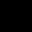

In [20]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
# Import cv2_imshow from google.colab.patches for displaying images in Colab
from google.colab.patches import cv2_imshow


# Load trained model
model = load_model('cifar10_model.h5')

# Define image path and label dictionary
image_path = '/content/truck.jpeg'
label_dict = {i: label for i, label in enumerate(class_labels)}

# Load and preprocess image
img = cv2.imread(image_path)
img = cv2.resize(img, (32, 32))
img = img / 255.0

# Add batch dimension
img = np.expand_dims(img, axis=0)

# Make prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)

# Get predicted label
predicted_label = label_dict[predicted_class]

print(f"Predicted Class: {predicted_class}")
print(f"Predicted Label: {predicted_label}")

# Display image with predicted label using cv2_imshow
# Replace cv2.imshow with cv2_imshow
cv2_imshow(img.squeeze())
cv2.waitKey(0)
cv2.destroyAllWindows()